# How to use Symbolic Python to calculate errors
Alastair McLean 

This was my first attempt at using Python's SymPy package to calculate errors. I have added a lot of comments. If you take the comments out, the code is actually very short. If you find out more elegant ways of coding this, please let me know! I have checked the numerical output against some Mathematica code and the answer is correct. 

### The Line Spacing of a CD

In [39]:
import sympy as sym
from sympy.functions import Abs
import numpy as np

The following command will turn on output formatting.

In [40]:
sym.init_printing()

Here I define the three variables I will use and their errors. 

In [41]:
l, x, y, dl, dx, dy = sym.symbols('l x y sigma_l sigma_x sigma_y')  

To distinguish the variables from the value of the variables that I measured in experiment, I append _val on the end of each variable.

In [42]:
l_val = 0.000000594
x_val = 1.554
y_val = 0.618
dl_val = 0.001*l_val
dx_val = 0.004*x_val
dy_val = 0.005*y_val

Here is the function that is used to calculate the linespacing of the CD.

\begin{equation}
d = \lambda \sqrt{1+\frac{x}{y}^2}
\end{equation}

The Python version of the function is:

In [43]:
d = l*sym.sqrt(1+pow(x/y,2))

I could not get $\lambda$ to work, so I used $l$. In the following line I evaluate d and assign it to d_val using the values of l, x and y that I obtained from experiment (l_val, x_val and y_val).

In [44]:
d_val = d.subs([(l,l_val),(x,x_val),(y,y_val)])

Next, I sympy to calculate the partial derivatives. 

In [45]:
dddl = sym.a(sym.diff(d,l))
dddx = Abs(sym.diff(d,x))
dddy = Abs(sym.diff(d,y))

I get sympy to calculate the formula that describes the error.

In [46]:
d_error = sym.sqrt(pow(dddl*dl,2)+pow(dddx*dx,2)+pow(dddy*dy,2))

I calculate the error by substituting the values. 

In [47]:
d_error_val = d_error.subs([(l,l_val),(x,x_val),(y,y_val),(dl,dl_val),(dx,dx_val),(dy,dy_val)])

I now print out the results of the error calculation.

In [48]:
print("Linespacing: {:.1e}".format(d_val))
print("Absolute error: {:.1e}".format(d_error_val))
print("Percentage error: {:.1e}".format(100.0*d_error_val/d_val))

Linespacing: 1.6e-6
Absolute error: 9.0e-9
Percentage error: 5.6e-1


If you need the analytical function that describes the error, here it is.

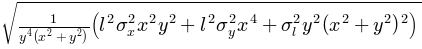

In [49]:
sym.simplify(d_error)